In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('visuals', exist_ok=True)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

In [2]:
df = pd.read_csv("Preprocessed_Telco_Churn.csv")
print("✅ Dataset Loaded:", df.shape)
df.head()

✅ Dataset Loaded: (7043, 26)


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Churn,Column1,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,-1.277445,0,No phone service,No,Yes,No,...,0,NaN,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0.066327,1,No,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,-1.236724,1,No,Yes,Yes,No,...,1,NaN,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0.514251,0,No phone service,Yes,No,Yes,...,0,NaN,True,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,-1.236724,1,No,No,No,No,...,1,NaN,False,True,False,False,False,False,True,False


## 1️⃣ Churn Distribution
This chart shows the proportion of customers who have churned vs. those who have stayed.

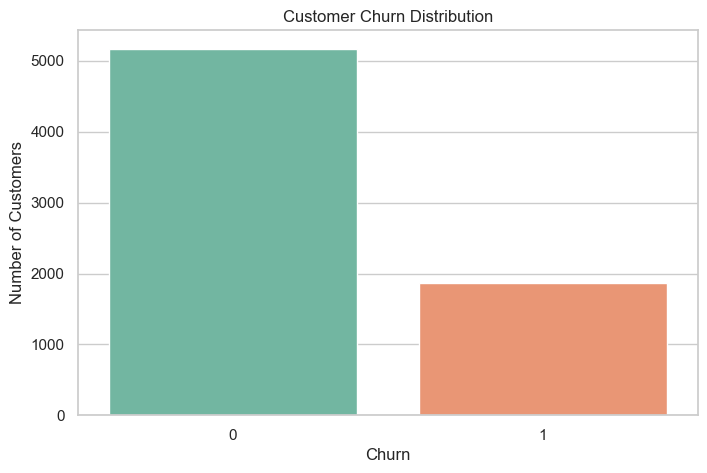

In [4]:
plt.figure()
sns.countplot(x='Churn', hue='Churn', data=df, palette='Set2', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

## 2️⃣ Monthly Charges vs Churn
This box plot helps identify whether customers with higher monthly charges are more likely to churn.

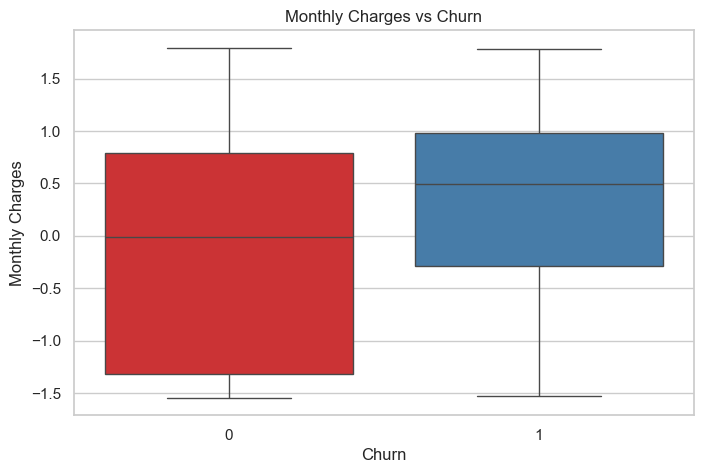

In [6]:
plt.figure()
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette='Set1', legend=False)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


## 3️⃣ Tenure vs Churn (Violin Plot)
Illustrates how customer tenure affects churn tendency.

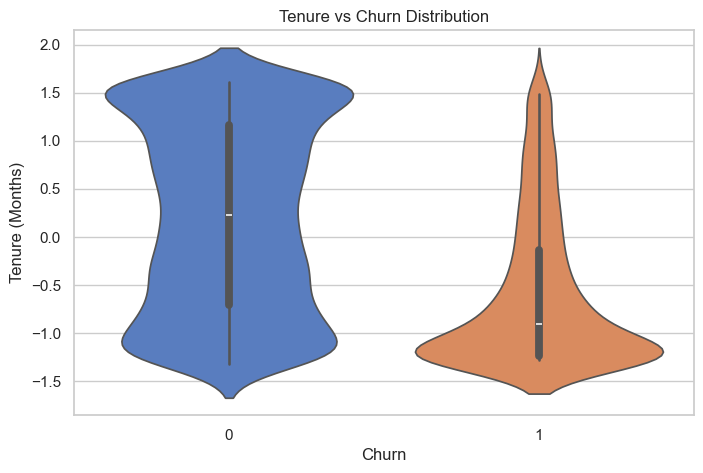

In [7]:
plt.figure()
sns.violinplot(x='Churn', y='tenure', hue='Churn', data=df, palette='muted', legend=False)
plt.title('Tenure vs Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

## 4️⃣ Pair Plot of Key Numerical Features
Visualizes relationships between tenure, monthly charges, and total charges, colored by churn status.

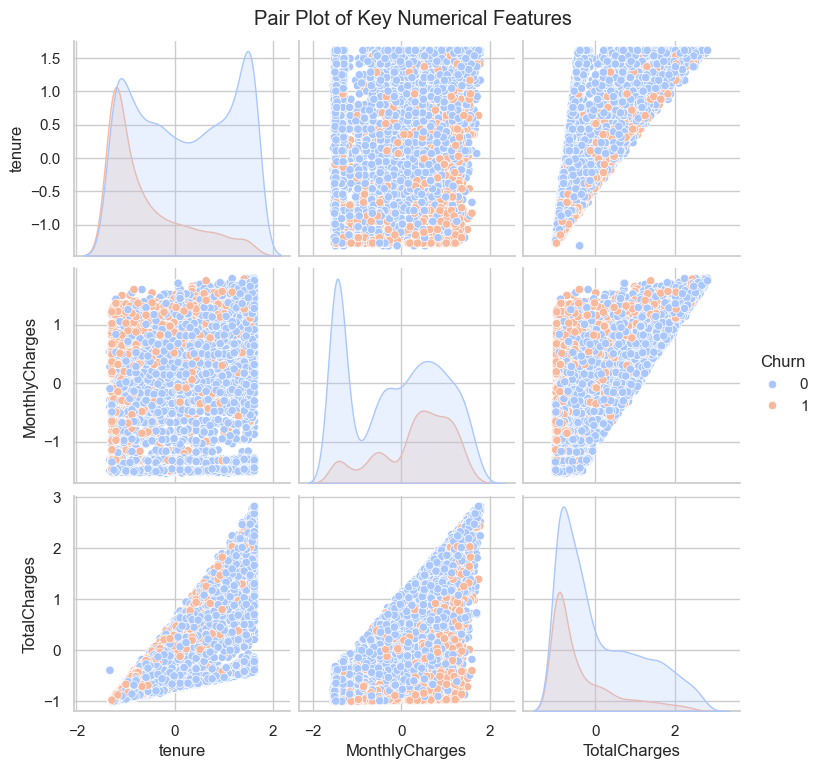

In [8]:
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges','Churn']], 
             hue='Churn', palette='coolwarm')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02)
plt.show()

## 5️⃣ Correlation Heatmap
Displays relationships among all numerical variables.

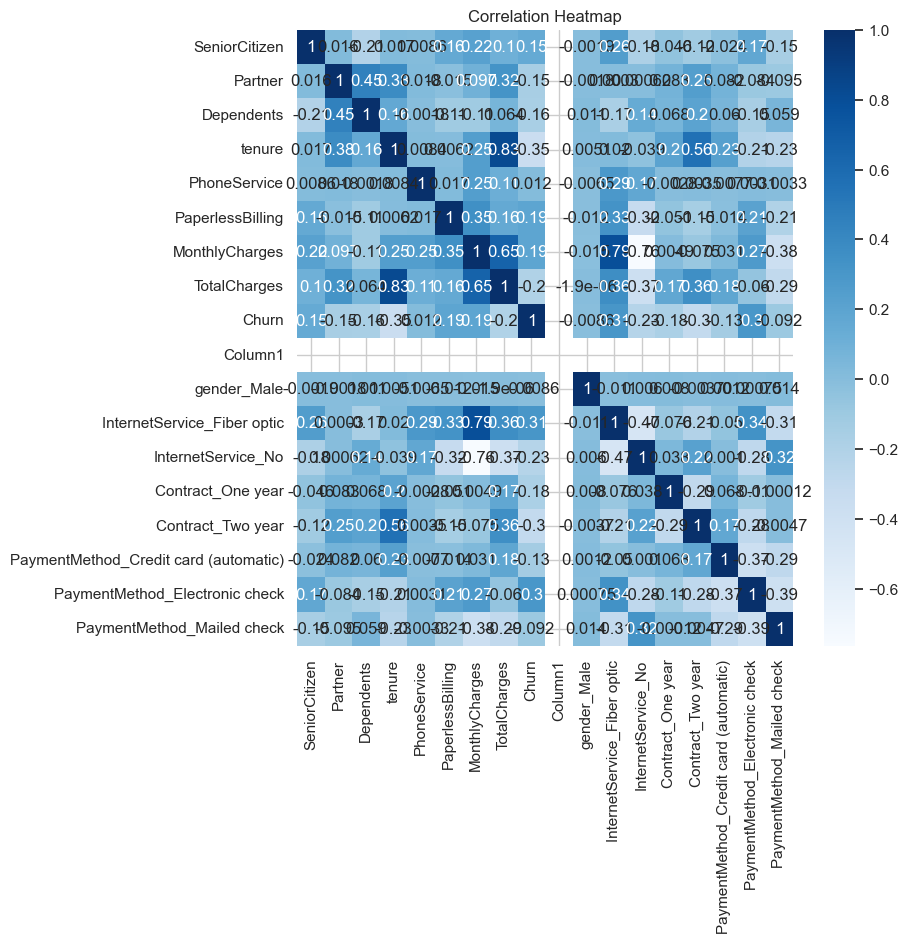

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## 6️⃣ Churn by Contract Type
Analyzes churn rates across different contract agreements.

Detected contract column(s): ['Contract_One year', 'Contract_Two year']


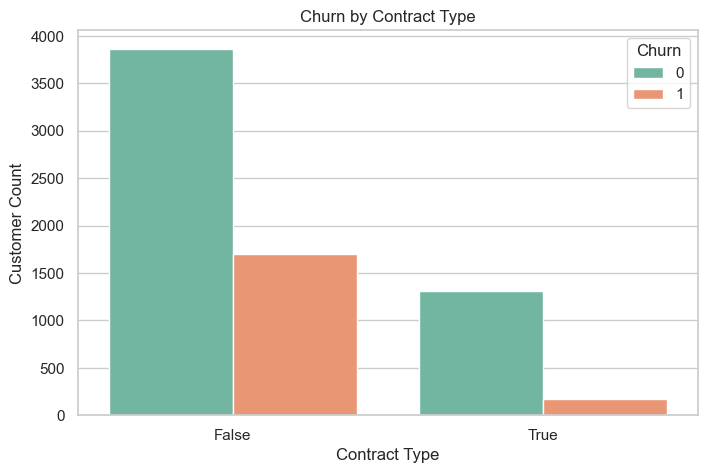

In [17]:
possible_contract_cols = [col for col in df.columns if 'contract' in col.lower()]
print("Detected contract column(s):", possible_contract_cols)

contract_col = possible_contract_cols[0] if possible_contract_cols else None

if contract_col:
    plt.figure()
    sns.countplot(x=contract_col, hue='Churn', data=df, palette='Set2')
    plt.title('Churn by Contract Type')
    plt.xlabel('Contract Type')
    plt.ylabel('Customer Count')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

## 7️⃣ Churn by Payment Method
Shows how payment preferences influence churn.

Detected payment column(s): ['PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


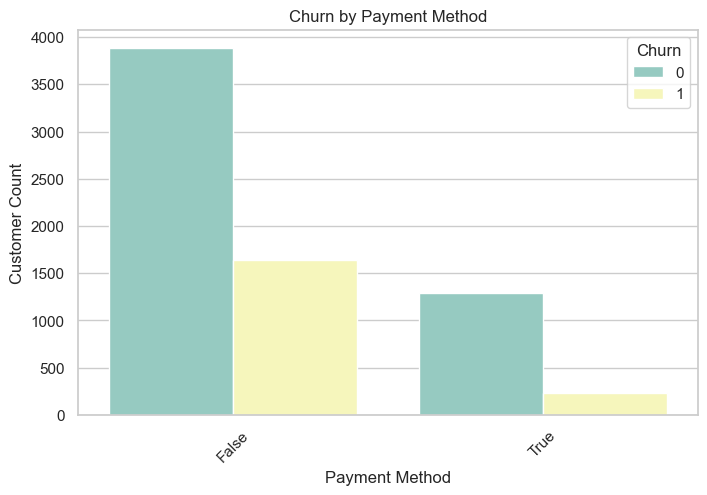

In [18]:
possible_payment_cols = [col for col in df.columns if 'payment' in col.lower()]
print("Detected payment column(s):", possible_payment_cols)

payment_col = possible_payment_cols[0] if possible_payment_cols else None

if payment_col:
    plt.figure()
    sns.countplot(x=payment_col, hue='Churn', data=df, palette='Set3')
    plt.title('Churn by Payment Method')
    plt.xlabel('Payment Method')
    plt.ylabel('Customer Count')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.show()

In [22]:
plt.figure()
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df, palette='Set1', legend=False)
plt.title('Monthly Charges vs Churn')
plt.savefig('visuals/boxplot_charges_vs_churn.png', bbox_inches='tight')
plt.close()

print("✅ Plot saved successfully to: visuals/boxplot_charges_vs_churn.png")


✅ Plot saved successfully to: visuals/boxplot_charges_vs_churn.png
